# import all libraries

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Load an csv file 

In [29]:
# loading an dataset

dataset = pd.read_csv('../Dataset/cashewgrade.csv')

In [30]:
dataset.head()

,Compactness,Roundness,SF3,area,centroid-0,centroid-1,eccentricity,equivalent_diameter,local_centroid-0,local_centroid-1,major_axis_length,minor_axis_length,orientation,perimeter,solidity,grade
0,0.622590,0.538677,0.844729,47803,299.181600,389.728511,0.888505,246.7077,129.1816,193.72850,396.2604,181.8307,-1.285080,1056.0100,0.836477,180
1,0.694813,0.546764,0.801954,42838,289.150170,320.432443,0.798507,233.5445,143.1502,99.43244,336.1259,202.3428,-0.068460,992.2468,0.799963,180
2,0.630309,0.566930,0.859064,45840,219.176592,379.646313,0.886636,241.5891,148.1766,167.64630,383.2865,177.2579,-1.113530,1008.0040,0.862611,180
3,0.627423,0.484092,0.749458,41437,282.700437,309.548881,0.850942,229.6938,160.7004,135.54890,366.0905,192.2926,-0.228020,1037.1340,0.768890,180
4,0.640804,0.542456,0.790516,41909,279.686440,382.267556,0.854503,230.9983,108.6864,166.26760,360.4817,187.2507,0.952847,985.3179,0.792650,180


In [11]:
dataset.shape

(1742, 16)

In [18]:
dataset.isnull().sum()

Compactness            0
Roundness              0
SF3                    0
area                   0
centroid-0             0
centroid-1             0
eccentricity           0
equivalent_diameter    0
local_centroid-0       0
local_centroid-1       0
major_axis_length      0
minor_axis_length      0
orientation            0
perimeter              0
solidity               0
grade                  0
dtype: int64

In [19]:
dataset.corr()

,Compactness,Roundness,SF3,area,centroid-0,centroid-1,eccentricity,equivalent_diameter,local_centroid-0,local_centroid-1,major_axis_length,minor_axis_length,orientation,perimeter,solidity,grade
Compactness,1.000000,0.406084,0.497299,0.009560,0.012578,-0.211007,-0.730556,-0.017809,0.117473,-0.286942,-0.351454,0.061490,-0.027220,0.007962,0.422427,0.119701
Roundness,0.406084,1.000000,0.696972,-0.333617,0.044644,-0.074430,0.070092,-0.302148,-0.166332,-0.271202,-0.410723,-0.423669,-0.010709,-0.396533,0.554862,0.232940
SF3,0.497299,0.696972,1.000000,-0.082178,0.045307,-0.009118,0.208330,-0.133794,-0.168607,-0.142883,-0.309730,-0.383407,-0.002406,-0.068530,0.776366,0.218095
area,0.009560,-0.333617,-0.082178,1.000000,-0.053642,0.184276,-0.064817,0.934193,0.451729,0.550390,0.853509,0.861679,-0.016584,0.885366,-0.049913,-0.566576
centroid-0,0.012578,0.044644,0.045307,-0.053642,1.000000,0.366353,0.017804,-0.081890,0.082125,-0.032912,-0.081692,-0.083965,-0.158364,-0.016081,0.011116,0.088832
centroid-1,-0.211007,-0.074430,-0.009118,0.184276,0.366353,1.000000,0.231270,0.204009,-0.131299,0.610339,0.255492,0.123018,-0.166050,0.112890,0.013981,-0.109025
eccentricity,-0.730556,0.070092,0.208330,-0.064817,0.017804,0.231270,1.000000,-0.068944,-0.257728,0.221590,0.163469,-0.359699,0.029168,-0.059754,0.143025,0.014369
equivalent_diameter,-0.017809,-0.302148,-0.133794,0.934193,-0.081890,0.204009,-0.068944,1.000000,0.495978,0.599732,0.937301,0.929087,-0.004067,0.667766,-0.056211,-0.781022
local_centroid-0,0.117473,-0.166332,-0.168607,0.451729,0.082125,-0.131299,-0.257728,0.495978,1.000000,-0.034844,0.430925,0.545257,0.006840,0.309837,-0.165438,-0.382172
local_centroid-1,-0.286942,-0.271202,-0.142883,0.550390,-0.032912,0.610339,0.221590,0.599732,-0.034844,1.000000,0.649153,0.497076,-0.041558,0.386868,-0.127155,-0.500973


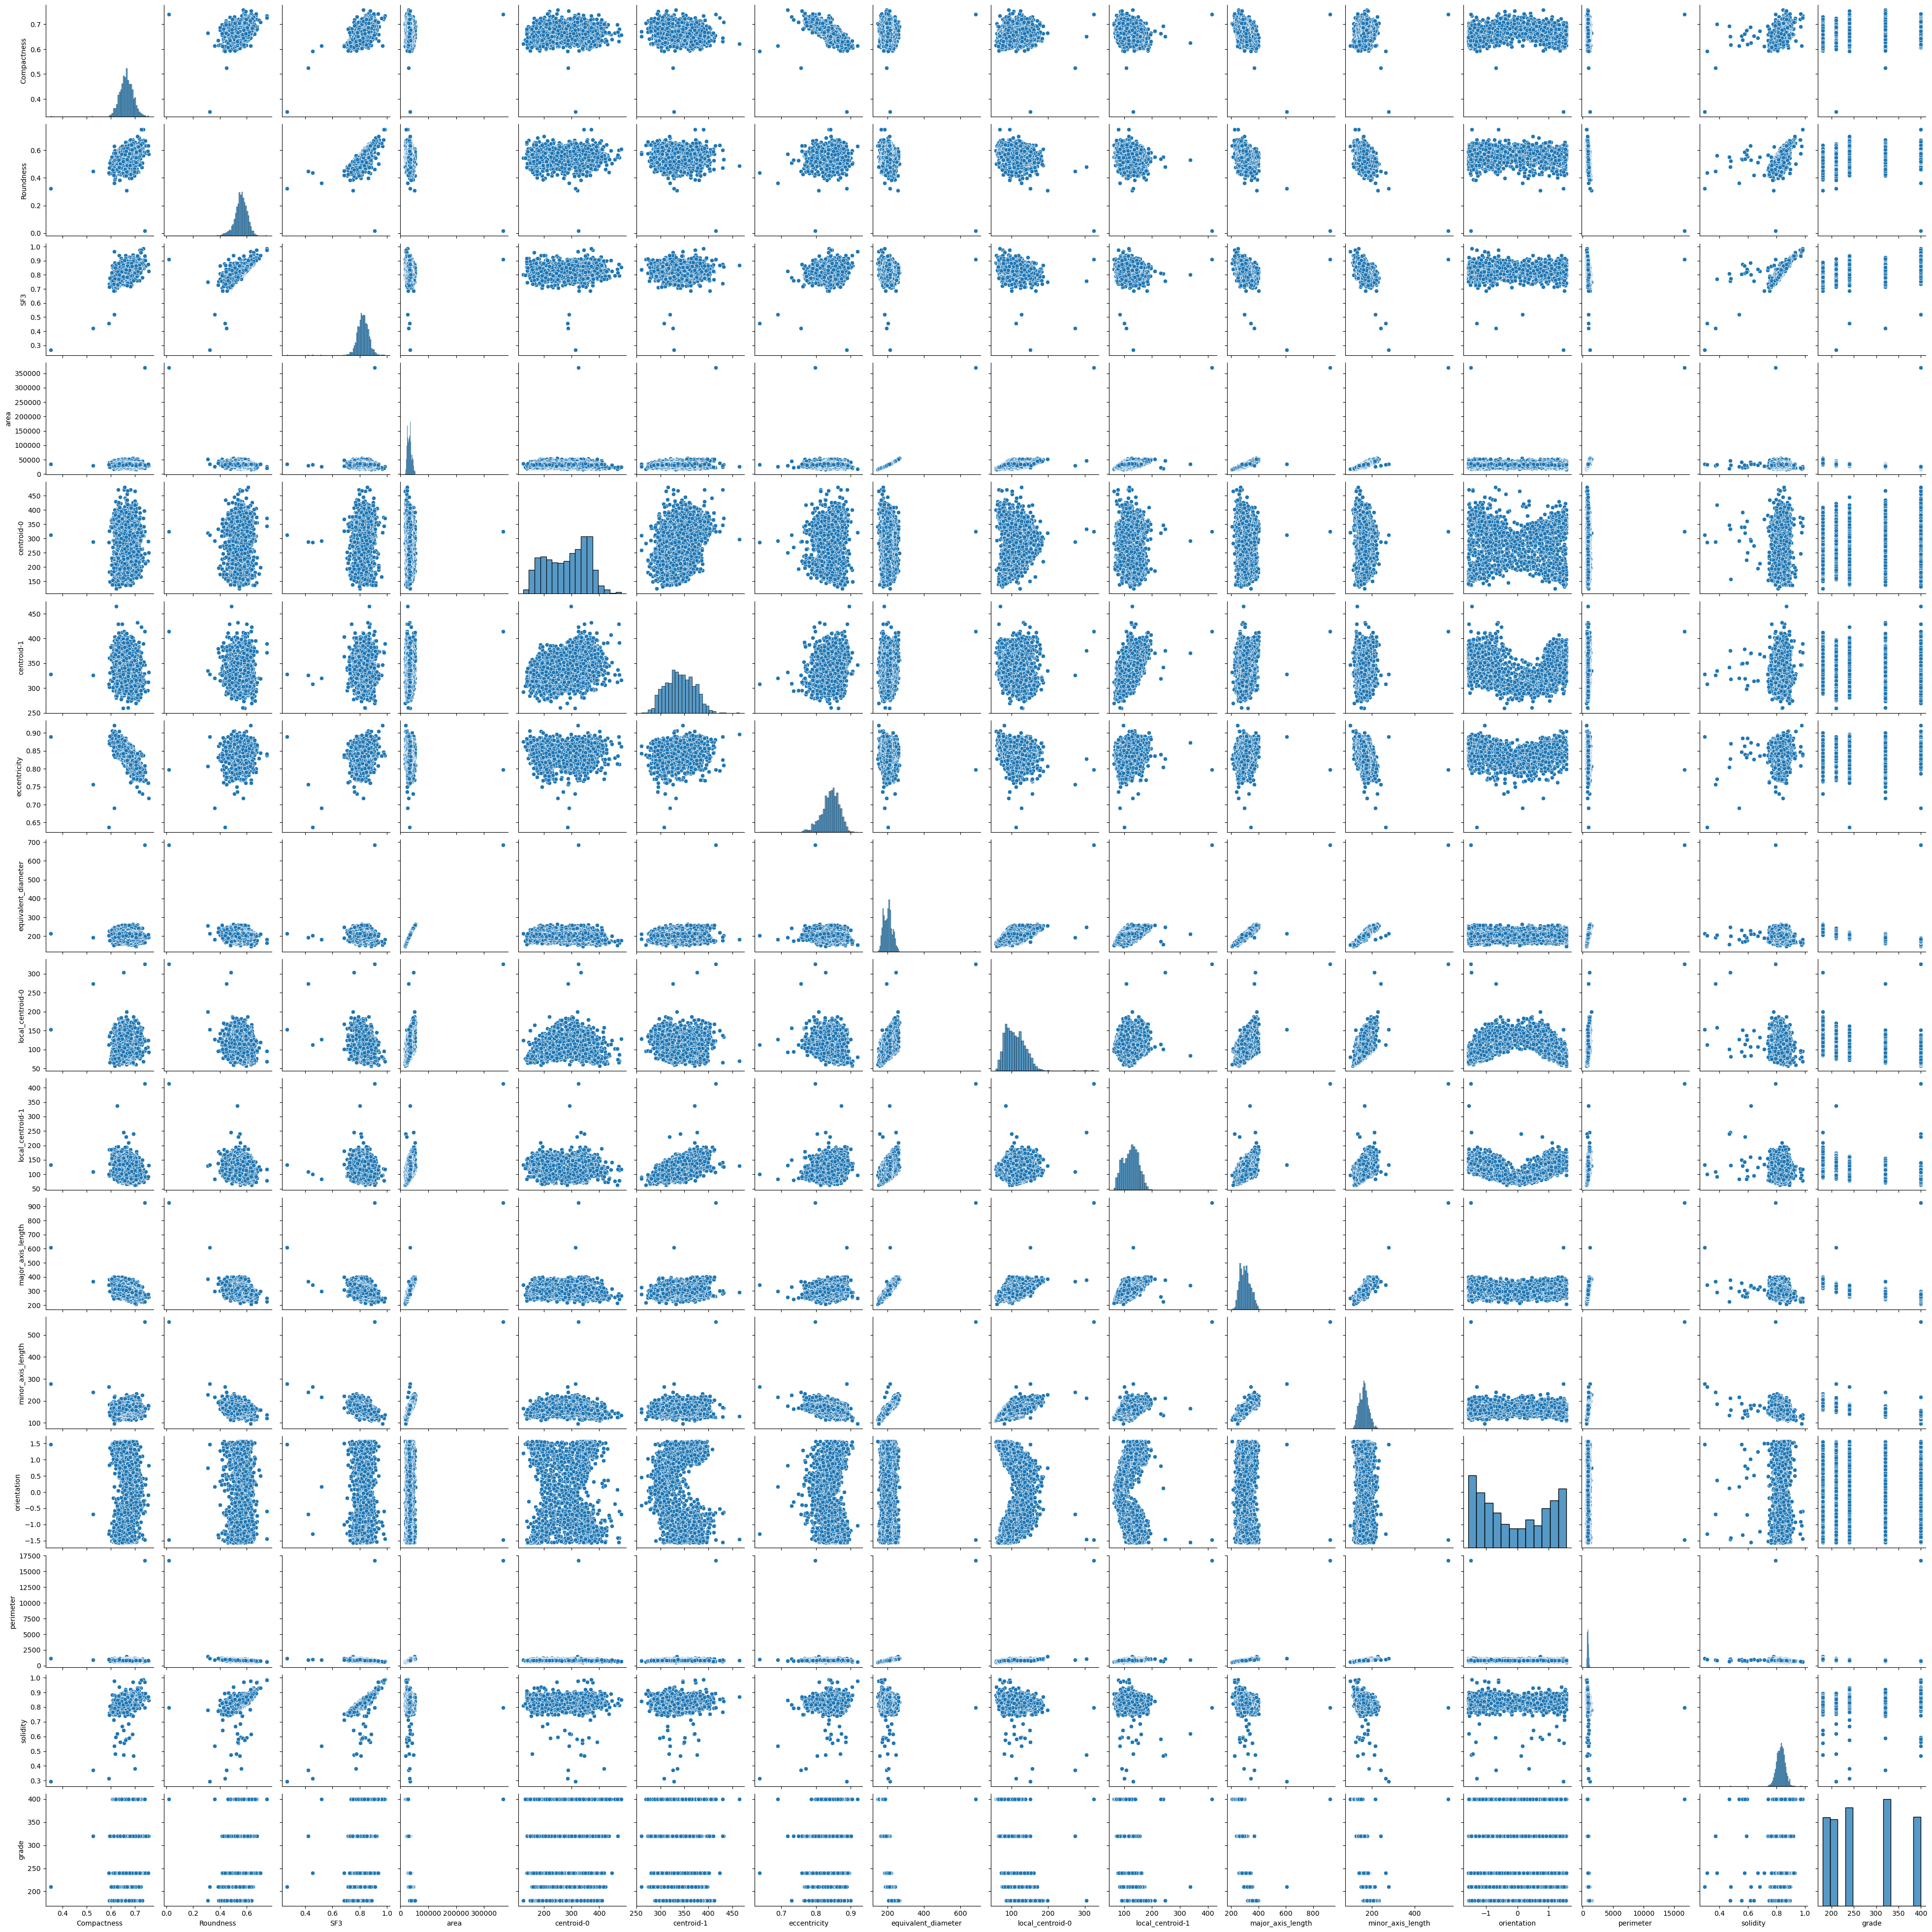

In [20]:
import seaborn as sns
sns.pairplot(dataset)

In [22]:
import matplotlib.pyplot as plt

In [23]:
plt.scatter(dataset['Compactness'],dataset['grade'])
plt.xlabel("Compactness")
plt.ylabel("Grade")

Text(0, 0.5, 'Grade')

In [27]:
import seaborn as sns
sns.regplot(x=dataset['SF3'],y=dataset['grade'],data=dataset)

<AxesSubplot:xlabel='SF3', ylabel='grade'>

In [31]:
# Split data into training and testing sets
X = dataset.drop('grade', axis=1)
y = dataset['grade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Initialize random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


In [33]:
# Train model on training set
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [34]:
# Predict on test set
y_pred = rf_model.predict(X_test)

In [35]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7277936962750716


In [36]:
!pip install joblib

Defaulting to user installation because normal site-packages is not writeable


In [41]:
import pickle
  
# Save the trained model as a pickle string.
saved_model = pickle.dumps(rf_model)
  
# Load the pickled model
rf_from_pickle = pickle.loads(saved_model)
  
# Use the loaded pickled model to make predictions
rf_from_pickle.predict(X_test)

array([240, 240, 400, 240, 400, 180, 180, 320, 320, 240, 210, 320, 320,
       210, 240, 320, 180, 320, 320, 320, 400, 240, 180, 180, 320, 210,
       180, 210, 320, 210, 210, 240, 180, 320, 240, 180, 320, 240, 240,
       180, 180, 400, 400, 320, 320, 240, 180, 210, 400, 400, 320, 240,
       180, 320, 320, 320, 320, 210, 180, 210, 180, 400, 240, 400, 320,
       210, 180, 320, 400, 400, 210, 240, 210, 240, 240, 210, 320, 240,
       180, 240, 180, 320, 210, 400, 240, 320, 320, 180, 180, 400, 400,
       180, 320, 240, 320, 320, 210, 240, 240, 240, 210, 180, 210, 320,
       210, 320, 240, 210, 180, 400, 180, 240, 400, 400, 320, 210, 180,
       180, 400, 180, 240, 320, 210, 240, 240, 320, 240, 400, 210, 320,
       240, 240, 240, 180, 210, 210, 400, 400, 320, 240, 240, 400, 240,
       210, 240, 400, 180, 240, 180, 400, 240, 240, 400, 400, 320, 320,
       400, 210, 400, 400, 320, 180, 320, 400, 180, 210, 400, 180, 240,
       400, 210, 180, 320, 210, 320, 240, 320, 180, 320, 210, 32

In [44]:
from joblib import Parallel, delayed
import joblib
  
  
# Save the model as a pickle in a file
joblib.dump(rf_model, 'rf.model')
  
# Load the model from the file
rf_from_joblib = joblib.load('rf.model')
  
# Use the loaded model to make predictions
rf_from_joblib.predict(X_test)

array([240, 240, 400, 240, 400, 180, 180, 320, 320, 240, 210, 320, 320,
       210, 240, 320, 180, 320, 320, 320, 400, 240, 180, 180, 320, 210,
       180, 210, 320, 210, 210, 240, 180, 320, 240, 180, 320, 240, 240,
       180, 180, 400, 400, 320, 320, 240, 180, 210, 400, 400, 320, 240,
       180, 320, 320, 320, 320, 210, 180, 210, 180, 400, 240, 400, 320,
       210, 180, 320, 400, 400, 210, 240, 210, 240, 240, 210, 320, 240,
       180, 240, 180, 320, 210, 400, 240, 320, 320, 180, 180, 400, 400,
       180, 320, 240, 320, 320, 210, 240, 240, 240, 210, 180, 210, 320,
       210, 320, 240, 210, 180, 400, 180, 240, 400, 400, 320, 210, 180,
       180, 400, 180, 240, 320, 210, 240, 240, 320, 240, 400, 210, 320,
       240, 240, 240, 180, 210, 210, 400, 400, 320, 240, 240, 400, 240,
       210, 240, 400, 180, 240, 180, 400, 240, 240, 400, 400, 320, 320,
       400, 210, 400, 400, 320, 180, 320, 400, 180, 210, 400, 180, 240,
       400, 210, 180, 320, 210, 320, 240, 320, 180, 320, 210, 32